<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/04.00-Aula4.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/04.00-Aula4.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;

[<- Aula 3: Continuação da análise do pêndulo](03.00-Aula3.ipynb) | [Página Inicial](00-Sumario.ipynb) 

---


# Aula 4: Estimativa básica de propagação de erros experimentais

### Objetivos

Vamos ver o básico de propagação de erros

- Erros em medições: descrição, tipos
- Propagação: distribuções de probabilidade e aproximação linear
- Regras práticas e exemplos.

Algumas Referências: 
- [Measurements and Error Analysis (pdf)](http://www.webassign.net/question_assets/unccolphysmechl1/measurements/manual.pdf)
- [An Introduction to Error Analysis (pdf)](http://www.dartmouth.edu/~pchem/75/pdfs/ErrAnalysis.pdf)

## Incertezas em mediçoes

Toda medição vem com um erro. (O conceito de erro é intrínseco ao de mediçao!)

$$ \text{valor medido} = \text{valor médio} \pm \text{intervalo de confiança/incerteza}$$

$$ q = \bar q \pm \Delta q, \ \ \text{intervalo } [-\Delta q, \Delta q], \ \ \Delta q >0$$

A ideia é ver como estimar essa incerteza e ver como essa incerteza (ou "erro") se propaga das quantidades medidas às quantidades derivadas delas, em algum modelo.

### Conceitos: precisão e acurácia

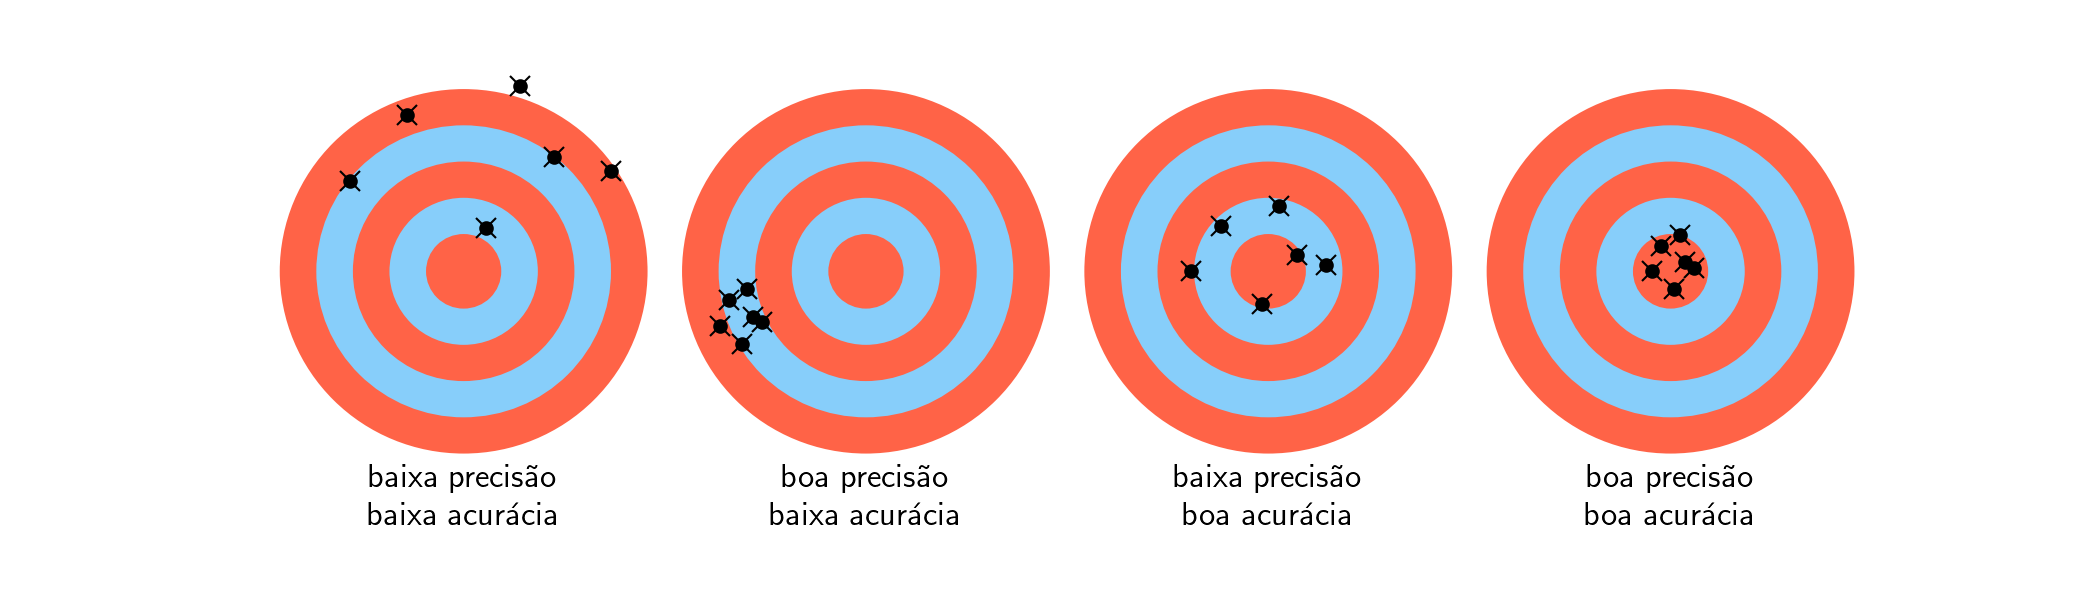

In [6]:
from os import path
from IPython.display import Image
Image(filename=path.join('..', 'dados', 'diversos', 'precisao_e_acuracia.png'), width=900) 

- **Precisão:** incerteza *relativa*, dependente apenas das medições feitas:

$$ e_q := \frac{\Delta q}{|q|} $$

- **Acurácia:** fidelidade com respeito a um valor esperado ou tabulado $q_e$:

$$ pr_q := \frac{|q-q_e|}{|q_e|} $$

### Clasificação simples das incertezas

- **Aleatórias:** 
    - flutuaçoes estatísticas (e.g. pequenas variações em aspectos pouco importantes e desprezados na modelagem)
    - alterações circunstanciais aleatórias (e.g. medições em momentos e condições ligeiramente diferentes)
    - resolução do aparelho de mediçao

- **Sistemáticas:** 
    - modelagem (aspectos relevantes desprezados na modelagem)
    - alterações circunstanciais consistentes (vícios na montagem do aparato experimental)
    - calibraçao (do sensor)

## Média e dispersão dos dados

Se fizermos N medições $q_1, \dots, q_N$ e plotarmos um *histograma* dessas medições, esperamos obter uma distribuiçao centrada perto do **valor médio**

$$ \bar q = \frac{q_1 + \ldots + q_N}{N}
$$ 

e com uma certa "dispersão" em torno de $q_e$.

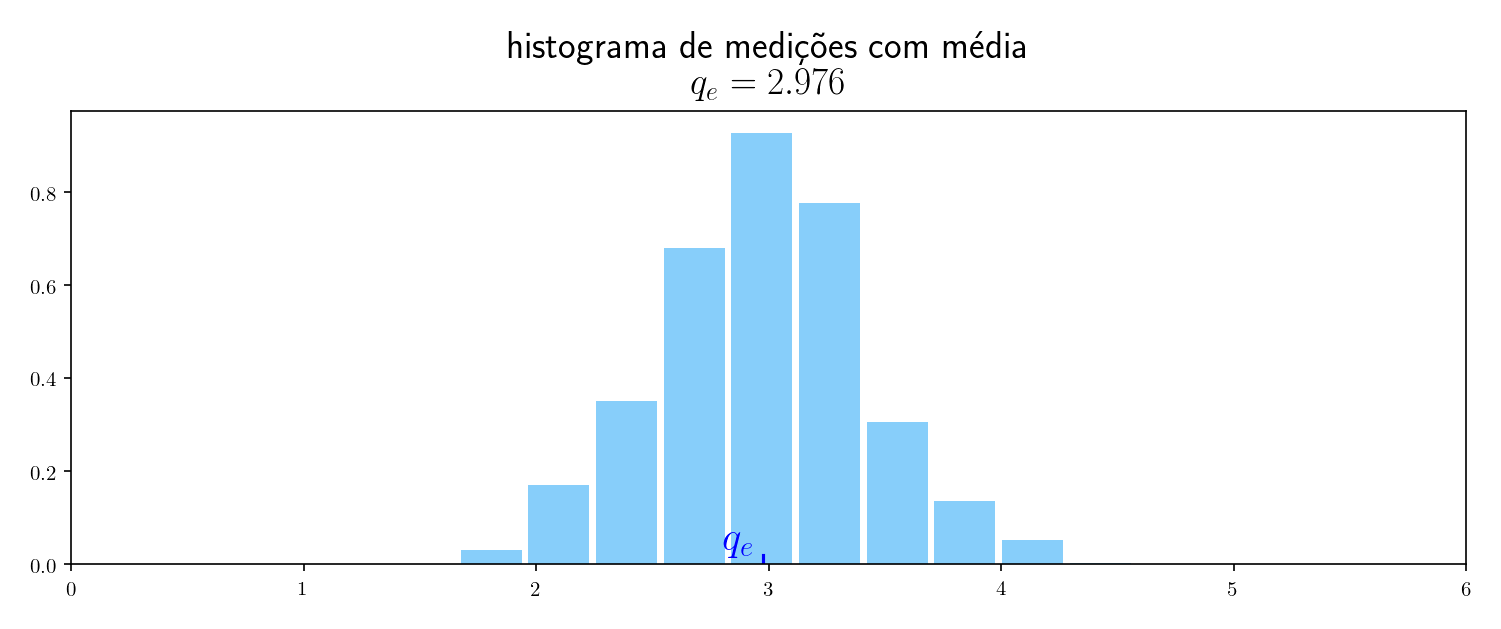

In [59]:
Image(filename=path.join('..','dados','diversos','histograma.png'), width=800) 

### Distribuição normal

O histograma acima foi formado a partir de amostras de uma **distribuição normal** de probabilidades $\mathcal{N}(\mu, \sigma^2)$, onde 

$$ \mu = E[q]
$$ 

é o **valor esperado** e

$$ \sigma = \sqrt{E[(q - \mu)^2]}
$$

é o **desvio padrão**. A **função de densidade de probabilidade** de uma normal $\mathcal{N}(\mu, \sigma^2)$ é dada por

$$ f_{\mu, \sigma^2}(q) = \frac{1}{\displaystyle \sqrt{2\pi \sigma^2}}e^{\displaystyle -\frac{(q-\mu)^2}{2\sigma^2}}
$$

O desvio padrão é uma medida da dispersão da distribuição. Em uma distribuição normal, 68,2% da probabilidade está concentrada no intervalo $[\mu-\sigma, \mu+\sigma]$ e 95,4% está concentrada em $[\mu-2\sigma, \mu+2\sigma]$.

No exemplo acima, utilizamos o valor esperado $\mu=3$ e a variância $\sigma^2 = 0.2$, de modo que o desvio padrão é da ordem de 0,45.

### Cálculo das probabilidades para uma distribuição normal em intervalos típicos

In [53]:
from scipy import integrate

def f(q):
    return np.exp(-(q**2)/2)/np.sqrt(2*np.pi)

print(int(1000*integrate.quad(f, -1, 1)[0])/10,'%')
print(int(1000*integrate.quad(f, -2, 2)[0])/10,'%')
print(int(1000*integrate.quad(f, -3, 3)[0])/10,'%')


68.2 %
95.4 %
99.7 %


### Distribuição normal e histograma com 1000 amostras

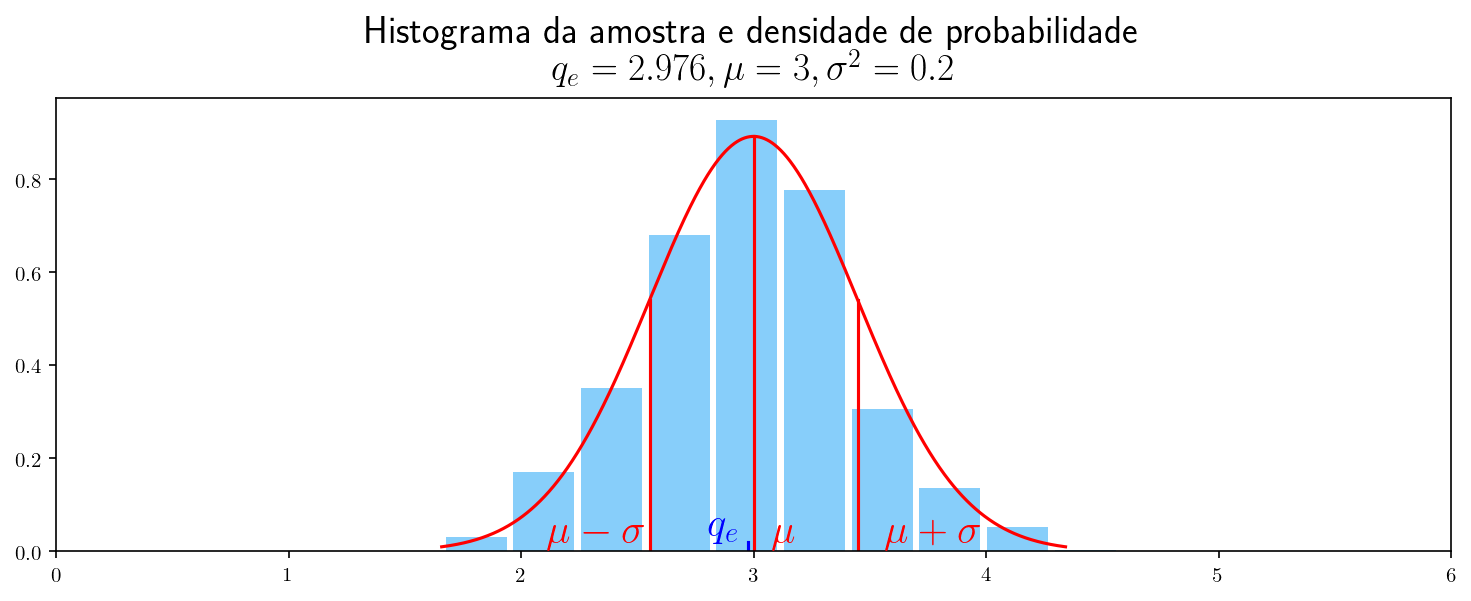

In [55]:
Image(filename=path.join('..', 'dados', 'diversos', 'histograma_com_distribuicao.png'), width=800) 

### Código para o último gráfico

Na geração da imagem acima, foi utilizado o seguinte código
```python
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

N=1000

mu = 3
variance = 0.2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, N)
y = stats.norm.pdf(x, mu, sigma)
mostra = np.random.normal(mu, sigma, N)

plt.figure(figsize=(12,4))

cor_densidade = 'red'
cor_linhas_densidade = 'red'

plt.plot(x, y, color=cor_densidade)

n, bins, patches = plt.hist(mostra, density=True, rwidth = 0.9, color=cor_hist)

plt.plot([x_avg,x_avg], [0,0.02], color=cor_linhas_hist)
plt.annotate(r'$q_e$', xy=(mu-0.06,0.02), color=cor_linhas_hist, ha='right', fontsize=20)

plt.plot([mu,mu], [0,y[int(N/2)]], color=cor_linhas_densidade)
plt.annotate(r'$\mu$', xy=(mu+0.08,0.02), color=cor_linhas_densidade, ha='left', fontsize=20)

plt.plot([mu-sigma,mu-sigma], [0,y[int(N/3)]], color=cor_linhas_densidade)
plt.annotate(r'$\mu - \sigma$', xy=(mu-sigma-0.02,0.02), color=cor_linhas_densidade, ha='right', fontsize=20)

plt.plot([mu+sigma,mu+sigma], [0,y[int(2*N/3)]], color=cor_linhas_densidade)
plt.annotate(r'$\mu + \sigma$', xy=(mu+sigma+0.12,0.02), color=cor_linhas_densidade, ha='left', fontsize=20)

plt.xlim(0, 2*mu)

title_str = 'Histograma da amostra e densidade de probabilidade\n $q_e = '+str(round(1000*x_avg)/1000)+', \mu = '+str(mu)+', \sigma^2 = '+str(variance)+'$'

plt.title(title_str, fontsize=18)

plt.savefig('histograma_com_distribuicao.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

plt.show()
```

Cada vez que o código é executado, dados sintéticos diferentes são gerados e o resultado é diferente a cada vez. Diminuindo ou aumentando o número de amostras $N$ podemos ter uma fidelidade menor ou maior à distribuição normal.

## Desvio padrão da amostra

Caso as medições sejam uma pequena amostra de uma distribuição de probabilidades, e como em muitos exemplos práticos só temos acesso a essas amostras e não à probabilidade toda, nem ao seu valor esperado ou desvio padrão, é comum se usar o **desvio padrão (corrigido) da amostra**

$$ s_q = \sqrt{\frac{1}{N-1}\sum_i (q_{i}-\bar q)^2}
$$

Observe a divisão por $N-1$, ao invés de $N$, que é o número de amostras e que seria, em princípio, mais natural. No entanto, como já calculamos $\bar q$, reduzimos o número de graus de liberdade dos dados para $N-1$. De fato, sabendo $\bar q$ e $N-1$ amostras, podemos encontrar o valor da amostra restante. O uso de $N-1$ também reduz um vício causado por essa redundância, caso a divisão fosse por $N-1$. Esta correção é conhecida como **correção de Bessel**. Veja mais informações sobre isso em [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).

**Observação:** Espera-se que a mediçao $N+1$ caia em $\bar q \pm s_q$ com $\sim 68.2\%$ confiança e em $\bar q \pm 2s_q$ com $\sim 95.4\%$ de confiança.

## Erro padrão

Já o **erro padrão da amostra** é definido por 

$$ \Delta q  = \frac{s_q}{\sqrt{N}}
$$

**Observação 1:** Um baixo valor de $\Delta q$ indica uma boa **precisão** dos dados.

**Observação 2:** O valor esperado $E[q]$ (desconhecido) da distribuicao de probabilidade da qual "extraímos" as amostras $q_1, \ldots q_N$ deve estar em $q_e \pm \Delta q$ com um certo grau de confiança que depende do número de amostra. Também podemos considerar o intervalo $q_e \pm 2\Delta q$ com um grau maior de confiança, da ordem de $95-96\%$. Estes são típicos **intervalos de confiança** com os seus respectivos **graus de confiança.**

Mais sobre *erro padrão* em [Standard error](https://en.wikipedia.org/wiki/Standard_error).

## Outliers e erros sistemáticos:

- **Outliers** são dados que estão bem distante dos outros dados do ensaio, podendo causar grandes distorções nas informações estatísticas que venham a ser extraídas da amostra. Se estamos seguros de que houve um erro considerável na obtenção desses dados (e.g. um sensor com defeito, um aparato mal montado) e que eles nao tem significado tão relevante, podemos desprezá-los.

- Em certos casos, podemos contabilizar **erros sistemáticos** nas medições usando distribuiçòes não normais, e.g. com asimetrias na probabilidade $q>q_e$ ou caudas mais longas ou mais curtas).

## Propagaçao de erros/incertezas

Quantidades derivadas dos dados $q$ obtidos no ensaio, que podemos escrever como $f(q)$, ou, mais geralmente, $f(q, r, \ldots)$ para várias medições, podem ter suas incertezas estimadas de acordo com a forma da função $f$.

A **ideia** é usar (supondo que $f$ seja suave) a aproximacao linear 

$$ f(q) \simeq f(\bar q) + \frac{df}{dq}(q_0) (q-\bar q)
$$

Com isto, podemos estimar

- O valor esperado para a quantidade derivada $f$: $f_e = f(q_e)$
- O intervalo de confianca: 

$$\Delta f = \left|\frac{df}{dq}(\bar q)\right| \Delta q.
$$

### Exemplos:

1. Caso $f(q) = q^2$, temos

$$\Delta f = 2|q_0| \Delta q, \qquad e_f = \frac{\Delta f}{|f|} = 2 e_q
$$

1. Se $f(q)=\sqrt{q}$, então

$$\Delta f = \frac{1}{2\sqrt{q_0}} \Delta q, \qquad e_f = \frac{1}{2} e_q
$$

1. Se $f(q) = cos(q)$ (em radianos), então

$$\Delta f = |sen(q_0)| \Delta q, \qquad e_f = |tan(q_0)| e_q.
$$

### Várias variáveis (eg: 2 por simplicidade)

Nesse caso, usamos a aproximação linear 

$$f(q,r) \simeq f(q_0,r_0) + \frac{\partial f}{\partial q}(q_0,r_0) (q-q_0) + \frac{\partial f}{\partial r}(q_0,r_0) (r-r_0)
$$

Em geral se assume que as medições de $q$ e $r$ não estão co-relacionadas, e isto se traduz na estimativa para a propagacao:

$$ \Delta f = \sqrt{\left(\frac{\partial f}{\partial q}(q_0,r_0) \Delta q\right)^2 + \left(\frac{\partial f}{\partial r}(q_0,r_0) \Delta r\right)^2 }
$$

**Regra pratica da soma dos erros absolutos:**. Como $x^2+y^2 \leq (|x| + |y|)^2$, então

$$\Delta f \leq  \left|\frac{\partial f}{\partial q}(q_0,r_0)\right| \Delta q + \left|\frac{\partial f}{\partial r}(q_0,r_0)\right| \Delta r$$

**Regra pratica da soma dos erros relativos:**

$$ e_f = \frac{\Delta f}{|f|} \leq \left|\frac{\partial f}{\partial q}(q_0,r_0)\right| e_q + \left|\frac{\partial f}{\partial r}(q_0,r_0)\right| e_r
$$


### Exemplos:

1. Se $f(q,r)= a q+ b r$, então
$$\Delta f = \sqrt{a^2 (\Delta q) ^2+b^2 (\Delta r)^2} \leq |a| \Delta q + |b| \Delta r
$$

1. Se $f(q,r) = a q^n r^m$, então
$$ \Delta f = \sqrt{(a n q_0^{n-1} r_0^m \Delta q)^2+(a m q_0^n r_0^{m-1} \Delta r)^2}
$$

**Obs:** **Esse último se aplica ao pêndulo,** vejo nos **Exercícios** abaixo.

## Regras práticas

As regras praticas sao muito úteis no laboratório e para fazer estimativas rápidas de ordens de grandeza, determinar efeitos relevantes/irrelevantes, etc.

**Uso**: Nos projetos a serem entregues, pelo menos nas partes que envolverem medições experimentais ou simulações computacionais, esperamos que seja incluída uma análise elementar da propagação dos erros e a comparacao com valores tabulados/referência (eg: aceleração da gravidade $g$ tabulada) dentro dos intervalos de confiança, etc.

## Barras de erro

Barras de erro podem ser geradas com a função [matplotlib.pyplot.errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html).

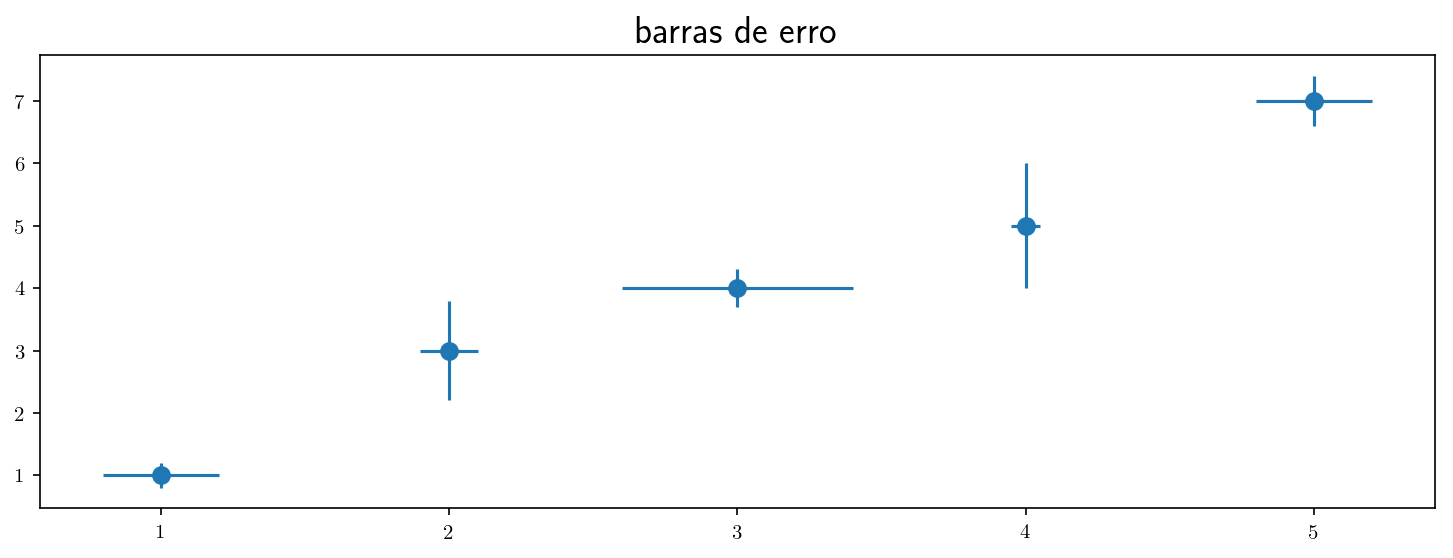

In [58]:
Image(filename=path.join('..', 'dados', 'diversos', 'barras_de_erro.png'), width=800) 

### Código para as barras de erro

A figura acima, exemplificando a exibição de barras de erro, foi feita com o seguinte código:

```python
import numpy as np
import matplotlib.pyplot as plt

# dados sintéticos
x = [1,2,3,4,5]
y = [1,3,4,5,7]

# erros sintéticos
xerr = [0.2, 0.1,0.4,0.05,0.2]
yerr = [0.2, 0.8,0.3,1,0.4]

# figura
plt.figure(figsize=(12,4))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, marker='o', markersize=8, linestyle='none')
plt.title("barras de erro", fontsize=18)

plt.savefig('barras_de_erro.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

plt.show()
```

## Exercícios

Para cada comprimento $l$, pegar o arquivo correspondente dos dados do movimento do pêndulo (iluminância e proximidade) e extrair de cada um deles uma coleção de instantes $(t_1, ... , t_n)$ entre cada dois mínimos (pontos de proximidade), ou cada dois máximos (longe da sensor), que são informações sobre o período do movimento (a cada dois pois o pêndulo passa a cada meio-período sobre o sensor). Pode-se desprezar os *outliers*.

- Para cada comprimento:
    1. Plotar esta amostra em um histograma.
    1. Achar a média $\bar t$ e o desvio padrão corrigido $s_t$ dessa amostra.
    1. Achar o erro padrão $\Delta t$ desta quantidade. 
    1. Assumindo que na medição do comprimento $l$ há uma incerteza de $e_l \simeq 1\%$, estimar o erro na quantidade derivada $$ g \equiv g(t,l) = 4 \pi^2 l/(2t)^2.$$
    1. Verificar se o valor tabulado $g_e = 9.8 m/s^2$ cai dentro da margem de erro para cada $l$.
- Usando todos os comprimentos:
    1. Fazer uma regressão dos valores $t$ versus $l$ do tipo $l = a (2t)^2$ e estimar o erro induzido na quantidade $a = a(t,l)$.
    1. Deduzir $g$ usando $a$ e comparar a estimativa do erro com a que vem dos $l$'s individuais, concluindo com qual método é mais preciso.


## Apresentação em slides:

Para visualizar na forma de slides, abrir um "terminal" *bash* e usar a linha de comando
```bash
jupyter nbconvert 04.00-Aula4.ipynb --to slides --post serve
```

Se quiser adicionar a possibilidade de rolar a página, caso algum *slide* seja muito longo, incluir a opção
```bash
--SlidesExporter.reveal_scroll=True
```

Para usar um tema diferente do padrão, temos a configuração via `SlidesExporter.reveal_theme`. Os temas disponíveis são `beige`, `black`, `blood`, `league`, `moon`, `night`, `serif`, `simple`, `sky`, `solarized`, `white`. O padrão é `white`. Um tema interessante é
```bash
--SlidesExporter.reveal_theme=solarized
```

Para usar um efeito de transição diferente do padrão, temos a configuração via `SlidesExporter.reveal_transition`. As opções são `none`, `fade`, `slide`, `convex`, `concave` e `zoom`. O padrão é `slide`. Uma transição interessante é 
```bash
--SlidesExporter.reveal_transition=convex
```

Mais informações sobre o `nbconvert` em [Configuration options (for nbconvert)](https://nbconvert.readthedocs.io/en/latest/config_options.html) e [Present Your Data Science Projects with Jupyter Notebook Slides!](https://medium.com/learning-machine-learning/present-your-data-science-projects-with-jupyter-slides-75f20735eb0f)

<!--NAVIGATOR-->

---
[<- Aula 3: Continuação da análise do pêndulo](03.00-Aula3.ipynb) | [Página Inicial](00-Sumario.ipynb) 

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/04.00-Aula4.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/04.00-Aula4.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;